In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

This datset contains 32560 records and 15 features.

Let's check for null in the dataset.

In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

This dataset does not contain duplicate values.

In [5]:
df.duplicated().sum()

24

Let's drop duplicate records in the datset.

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(32536, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [8]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Let's plot graphs and understand the data.

In [9]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


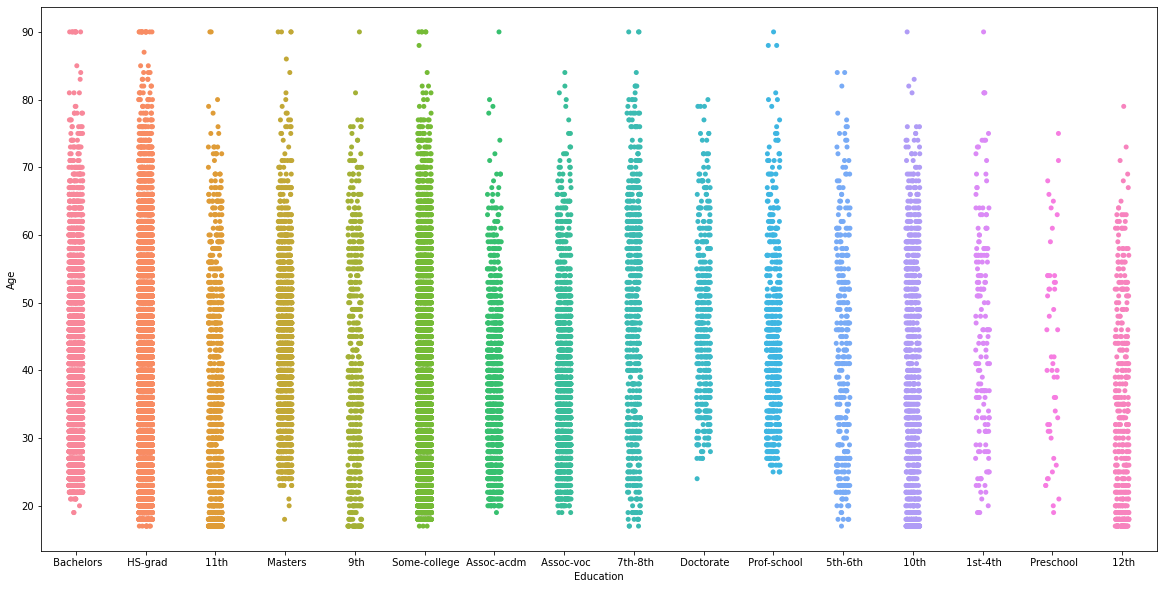

In [11]:
plt.figure(figsize=(20,10))
sns.stripplot(y='Age',x='Education',data=df)
plt.show()

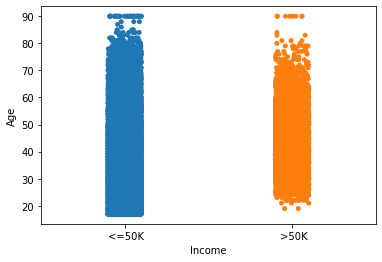

In [12]:
sns.stripplot(x='Income',y='Age',data=df)
plt.show()

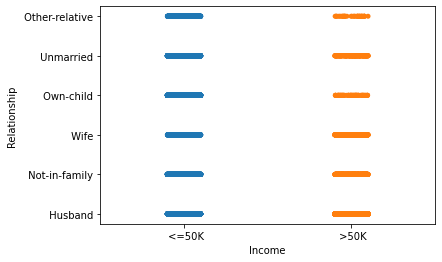

In [13]:
sns.stripplot(x='Income',y='Relationship',data=df)
plt.show()

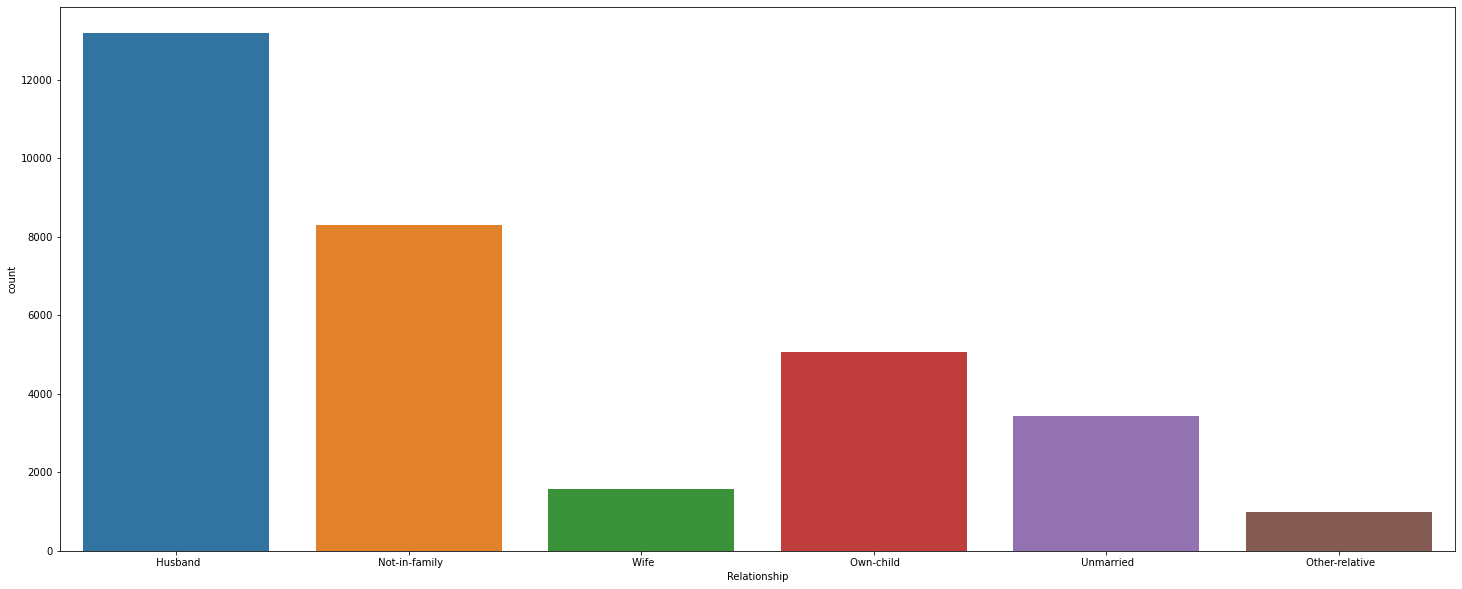

In [14]:
plt.figure(figsize=(25,10))
sns.countplot(x='Relationship',data=df)

plt.show()

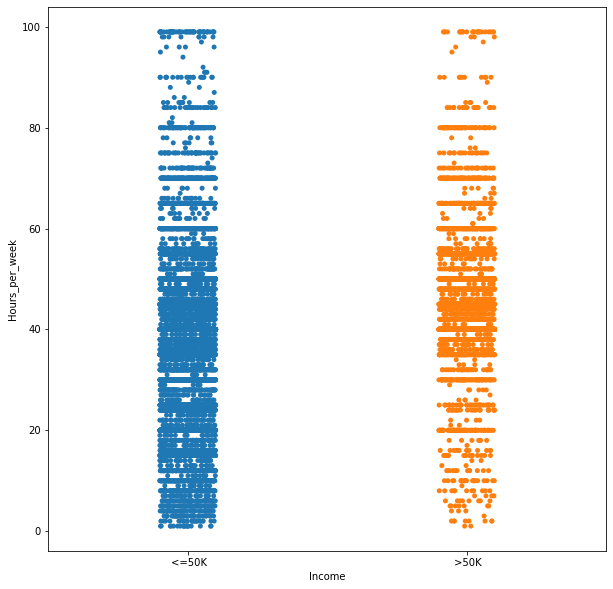

In [15]:
plt.figure(figsize=(10,10))
sns.stripplot(x='Income',y='Hours_per_week',data=df)
plt.show()

In [16]:
categorical_cols=[]
continuous_cols=[]

for i in df.columns:
    if(df[i].dtypes=='object'):
        categorical_cols.append(i)
        
    else:
        continuous_cols.append(i)

In [17]:
categorical_cols

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [18]:
continuous_cols

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

Let's check how data is distributed.

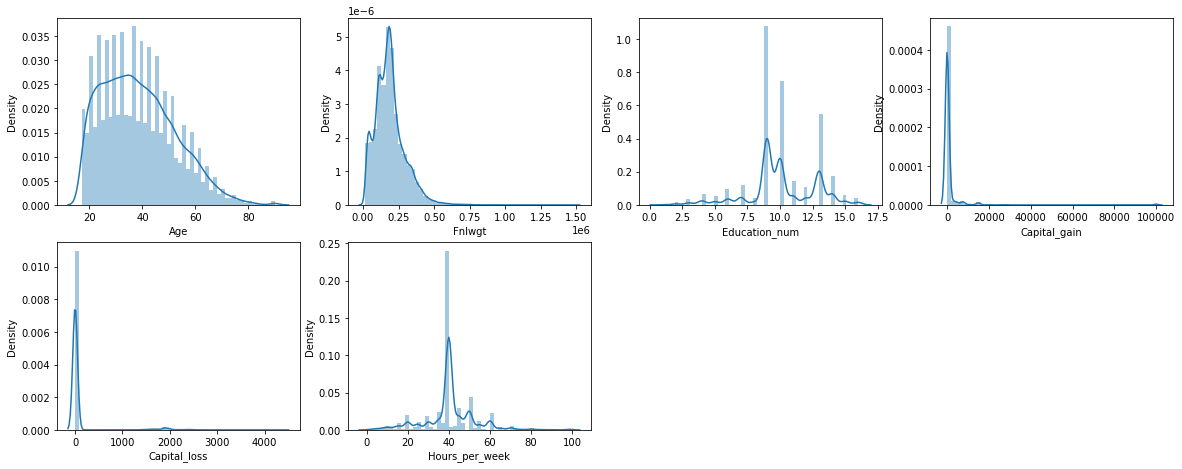

In [19]:

plt.figure(figsize=(20,20))
n=1
for i in continuous_cols:
    ax=plt.subplot(5,4,n)
    sns.distplot(x=df[i])
    plt.xlabel(i)
    n+=1
    
    
plt.show()    

In [20]:
df.skew()

Age                0.557657
Fnlwgt             1.447695
Education_num     -0.309454
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
dtype: float64

In [21]:
df['Fnlwgt']=np.cbrt(df['Fnlwgt'])

df['Capital_gain']=np.cbrt(df['Capital_gain'])
df['Capital_gain']=np.cbrt(df['Capital_gain'])
df['Capital_gain']=np.cbrt(df['Capital_gain'])

df['Capital_loss']=np.cbrt(df['Capital_loss'])
df['Capital_loss']=np.cbrt(df['Capital_loss'])
df['Capital_loss']=np.cbrt(df['Capital_loss'])

df.skew()

Age               0.557657
Fnlwgt           -0.163720
Education_num    -0.309454
Capital_gain      3.024199
Capital_loss      4.298314
Hours_per_week    0.228752
dtype: float64

After applying power transformation techniques multiple times, skeweness value for 'Capital_gain','Capital_loss' is not reduced.

Let's try to find outliers in the dataset.

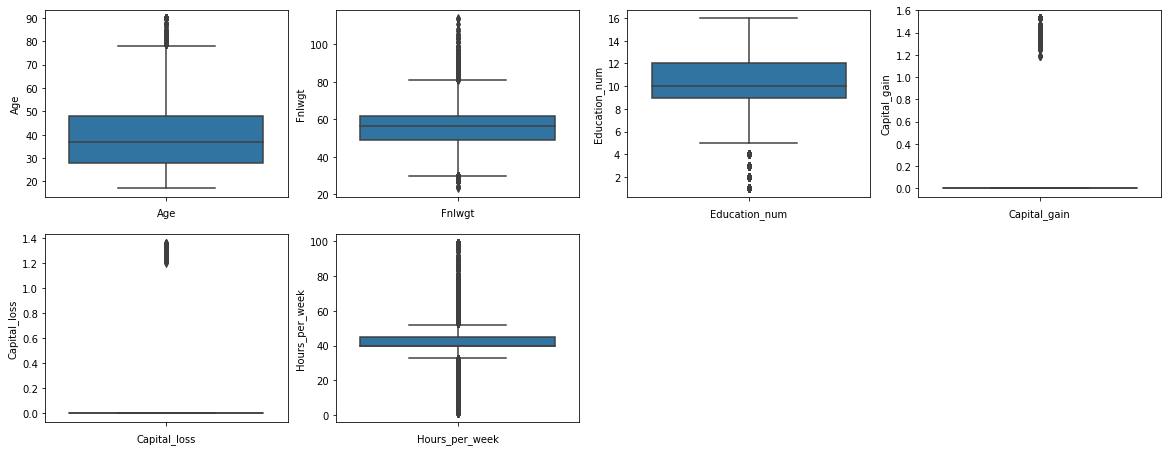

In [22]:

plt.figure(figsize=(20,20))
n=1
for i in continuous_cols:
    ax=plt.subplot(5,4,n)
    sns.boxplot(y=df[i])
    plt.xlabel(i)
    n+=1
    
    
plt.show()    

In [23]:
df['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

Outliers are present in all continuous features. Let's remove outliers from the dataset.

In [24]:
from scipy.stats import zscore

zscore=np.abs(zscore(df[continuous_cols]))
df1=df[(zscore<3).all(axis=1)]
df1.shape

(27581, 15)

Let's encode categorical columns with the help of encoding techniques.

In [25]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in categorical_cols:
    df1[i]=LE.fit_transform(df1[i])
    
df1.head()    

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,43.675121,8,13,2,4,0,4,1,0.0,0.0,13,38,0
1,38,4,59.967204,10,9,0,6,1,4,1,0.0,0.0,40,38,0
2,53,4,61.685627,1,7,2,6,0,2,1,0.0,0.0,40,38,0
3,28,4,69.686283,8,13,2,10,5,2,0,0.0,0.0,40,5,0
4,37,4,65.776255,11,14,2,4,5,4,0,0.0,0.0,40,38,0


In [26]:
for i in categorical_cols:
    print(i)
    print(df1[i].unique())
    print('---------------------------------')

Workclass
[6 4 7 1 2 0 5 8 3]
---------------------------------
Education
[ 8 10  1 11  5  6  7  4  9 13  3 12  0  2]
---------------------------------
Marital_status
[2 0 3 4 5 1 6]
---------------------------------
Occupation
[ 4  6 10  8  1 12  3 14  5  7 13  0 11  2  9]
---------------------------------
Relationship
[0 1 5 3 4 2]
---------------------------------
Race
[4 2 1 0 3]
---------------------------------
Sex
[1 0]
---------------------------------
Native_country
[38  5 22 18  0 25 34 32  9 11 19 29 21 30  4  1 36  2  7 24 14 31  6  8
 10 35 15 13 23 40  3 28 27 33 37 12 26 39 16 20 17]
---------------------------------
Income
[0 1]
---------------------------------


Let's check the correlation values of features and labels.

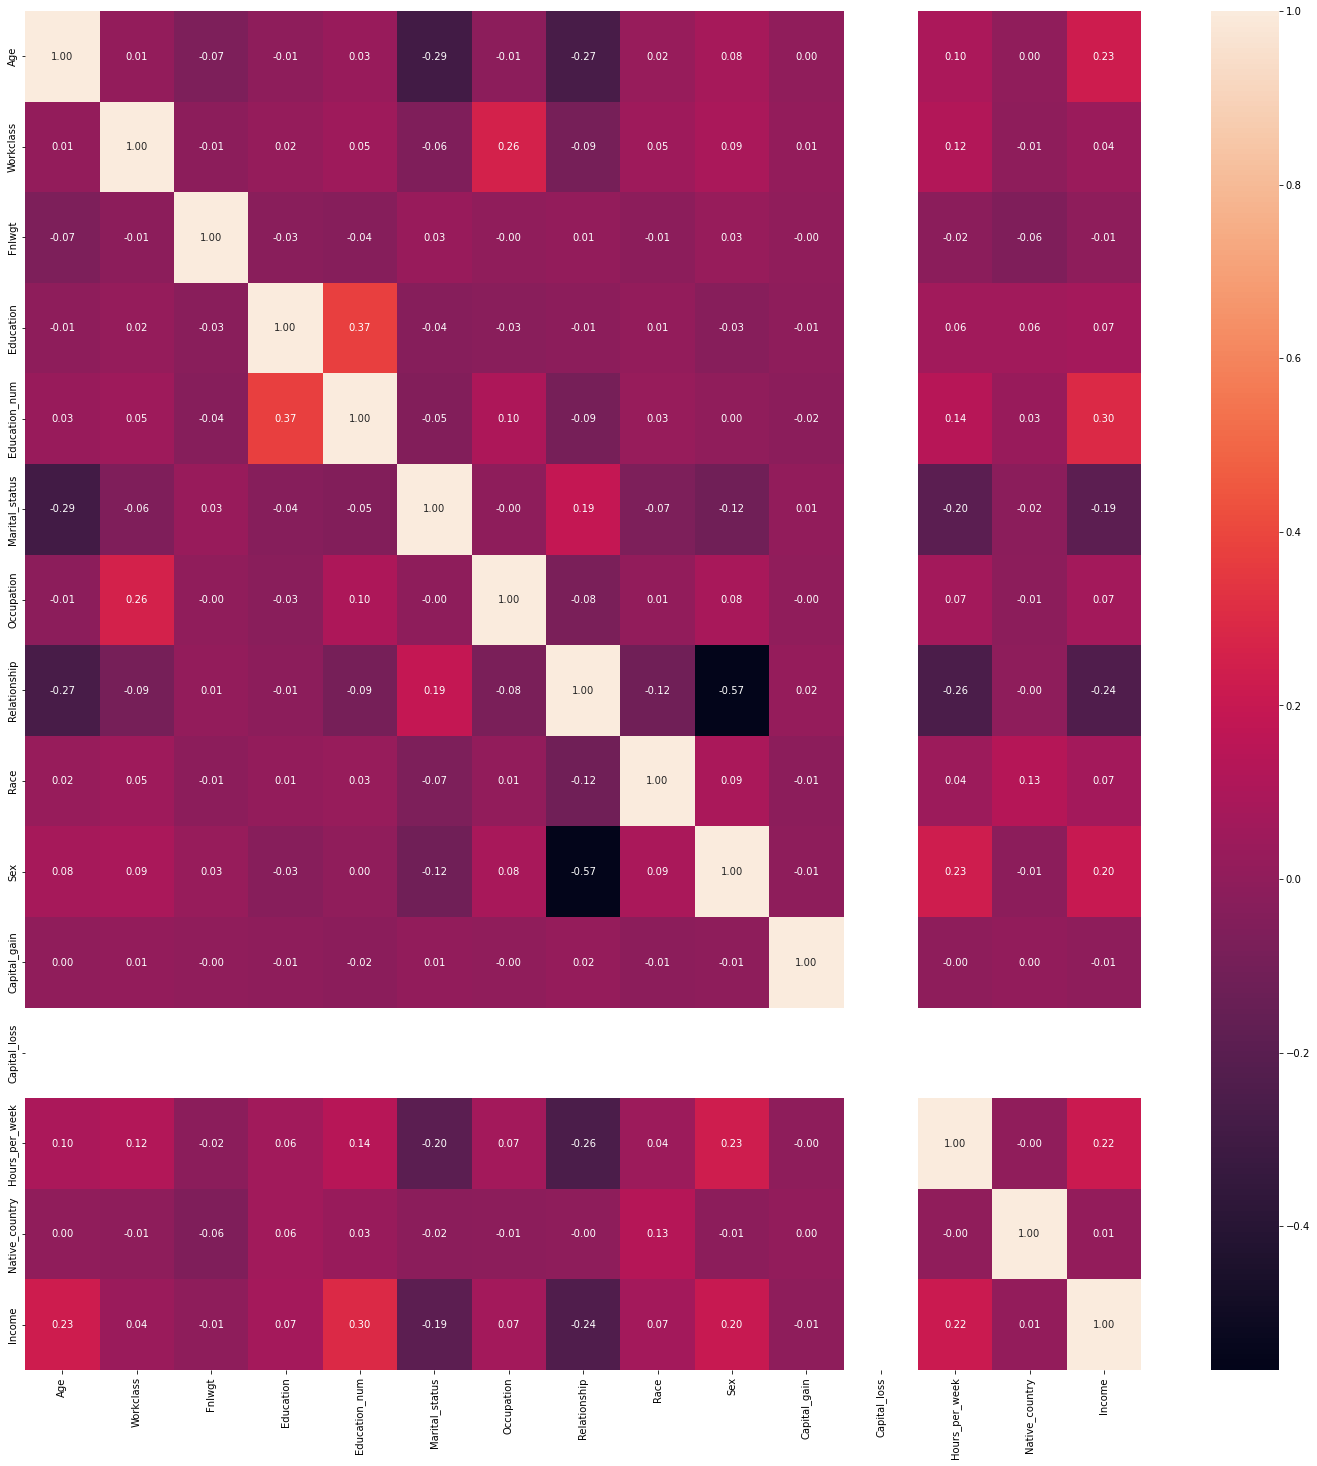

In [27]:
plt.figure(figsize=(25,25))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')
plt.show()

From the above we can observe 'Capital_loss' feature is high correlation value.

Let's drop that feature.

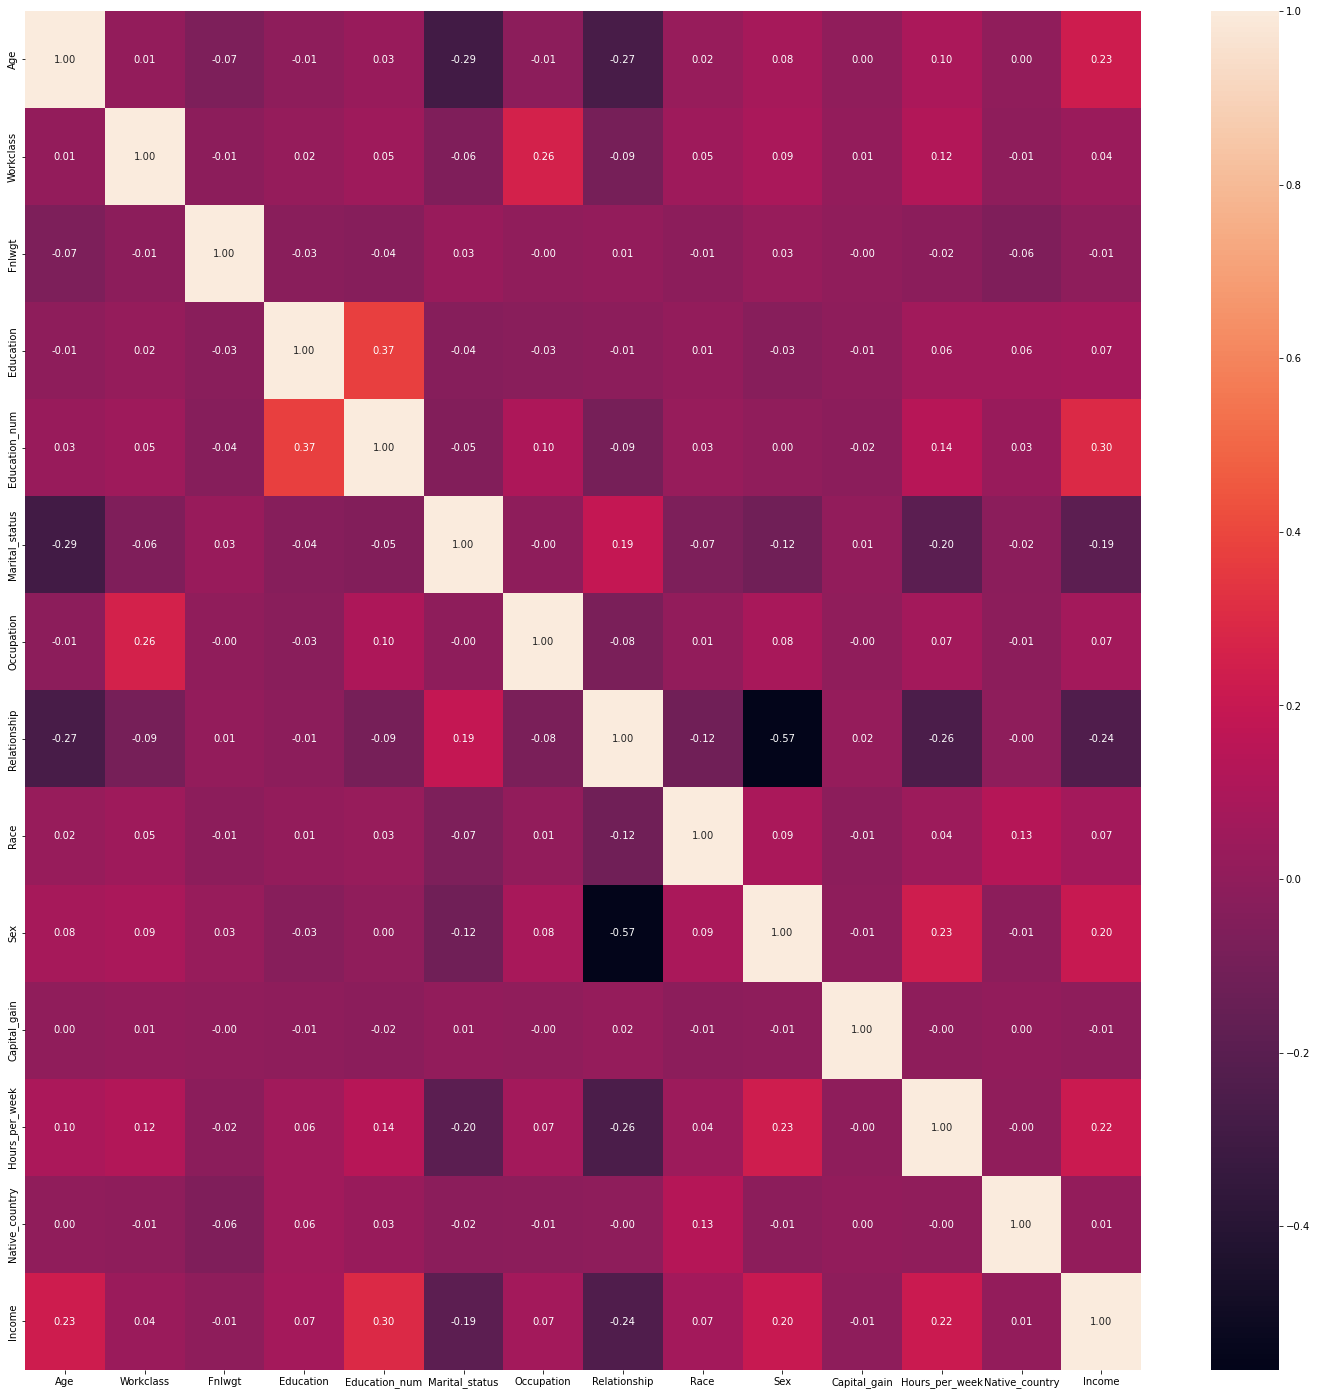

In [28]:
df1.drop('Capital_loss',axis=1,inplace=True)
plt.figure(figsize=(25,25))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')
plt.show()

From the above heatmap we can observe all the features are negatively and positively correlated with each other and target variable.

Let's check for Multi collinearity in the features.

In [29]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

x=df1.drop('Income',axis=1)
y=df1['Income']

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [30]:
Vif=pd.DataFrame()
Vif['Features']=x.columns
Vif['vif value']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
Vif

,Features,vif value
0,Age,1.170548
1,Workclass,1.090504
2,Fnlwgt,1.010894
3,Education,1.173409
4,Education_num,1.205734
5,Marital_status,1.142306
6,Occupation,1.091744
7,Relationship,1.646883
8,Race,1.037019
9,Sex,1.518291


From the above we can observe all features Vif value is in range.

Let's continue building model.

In [31]:
y.value_counts()

0    22313
1     5268
Name: Income, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE

SM=SMOTE()
x,y=SM.fit_resample(x,y)
y.value_counts()

0    22313
1    22313
Name: Income, dtype: int64

Let's find best Random state.

In [33]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [35]:
max_acc=0
max_rand_state=0
for i in range(1,20):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    y_predict=RFC.predict(x_test)
    acc_score=accuracy_score(y_test,y_predict)
    if(acc_score>max_acc):
        max_acc=acc_score
        max_rand_state=i
        
print("Best Random State - ",max_rand_state," Accuracy score - ",max_acc)        

Best Random State -  18  Accuracy score -  0.8986405736480431


Best Random state is 14.

In [41]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=18)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier

In [43]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_predict_LR=LR.predict(x_test)
acc_score_LR=accuracy_score(y_test,y_predict_LR)
print("Accuracy Score ",acc_score_LR)

Accuracy Score  0.7526889752016731


In [44]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_predict_DTC=DTC.predict(x_test)
acc_score_DTC=accuracy_score(y_test,y_predict_DTC)
print("Accuracy Score ",acc_score_DTC)

Accuracy Score  0.851508813863161


In [45]:
Knn=KNeighborsClassifier()
Knn.fit(x_train,y_train)
y_predict_Knn=Knn.predict(x_test)
acc_score_Knn=accuracy_score(y_test,y_predict_Knn)
print("Accuracy Score ",acc_score_Knn)

Accuracy Score  0.8565879892440992


In [46]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
y_predict_ABC=ABC.predict(x_test)
acc_score_ABC=accuracy_score(y_test,y_predict_ABC)
print("Accuracy Score ",acc_score_ABC)

Accuracy Score  0.8275321183149089


In [47]:
GDT=GradientBoostingClassifier()
GDT.fit(x_train,y_train)
y_predict_GDT=GDT.predict(x_test)
acc_score_GDT=accuracy_score(y_test,y_predict_GDT)
print("Accuracy Score ",acc_score_GDT)

Accuracy Score  0.8505377950403347


In [48]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
y_predict_BC=BC.predict(x_test)
acc_score_BC=accuracy_score(y_test,y_predict_BC)
print('Accuracy Score ',acc_score_BC)

Accuracy Score  0.8831042724828204


In [49]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
y_predict_RFC=RFC.predict(x_test)
acc_score_RFC=accuracy_score(y_test,y_predict_RFC)
print("accuracy score :",acc_score_RFC)

accuracy score : 0.8983417986256349


In [50]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
y_predict_ETC=ETC.predict(x_test)
acc_score_ETC=accuracy_score(y_test,y_predict_ETC)
print("Accuracy Score ",acc_score_ETC)

Accuracy Score  0.8966238422467881


From the above we can observe Random Forest Classifier and ExtraTreesClassifier exhibits highest accuracy score of 90%.

Let's check accuracy provided by these models is not because of overfitting of the model.

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

In [52]:
score=cross_val_score(RFC,x,y)
mean=score.mean()
print("Difference is ",acc_score_RFC-mean)

Difference is  0.0006347457395018408


In [53]:
score=cross_val_score(LR,x,y)
mean=score.mean()
print("Difference is ",acc_score_LR-mean)

Difference is  0.0036184312771797567


In [54]:
score=cross_val_score(Knn,x,y)
mean=score.mean()
print("Difference is ",acc_score_Knn-mean)

Difference is  0.02155886775907223


In [55]:
score=cross_val_score(DTC,x,y)
mean=score.mean()
print("Difference is ",acc_score_DTC-mean)

Difference is  -0.003330669947392173


In [56]:
score=cross_val_score(ETC,x,y)
mean=score.mean()
print("Difference is ",acc_score_ETC-mean)

Difference is  -0.0005678973663773013


In [57]:
score=cross_val_score(GDT,x,y)
mean=score.mean()
print("Difference is ",acc_score_GDT-mean)

Difference is  0.003474269293939236


In [58]:
score=cross_val_score(ABC,x,y)
mean=score.mean()
print("Difference is ",acc_score_ABC-mean)

Difference is  -0.001312957694432737


In [59]:
score=cross_val_score(BC,x,y)
mean=score.mean()
print("Difference is ",acc_score_BC-mean)

Difference is  -0.001225083548187067


From the above we can observe RandomForestClassifier has less cross validation score. Let's consider this as best model for this dataset. Let's generate classification report and confusion matrix.

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
print("confusion_matrix\n",confusion_matrix(y_test,y_predict_RFC))

confusion_matrix
 [[5828  857]
 [ 504 6199]]


In [62]:
print("classification report \n",classification_report(y_test,y_predict_RFC))

classification report 
               precision    recall  f1-score   support

           0       0.92      0.87      0.90      6685
           1       0.88      0.92      0.90      6703

    accuracy                           0.90     13388
   macro avg       0.90      0.90      0.90     13388
weighted avg       0.90      0.90      0.90     13388



Let's tune parameters and try to increase accuracy score.

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param={'max_depth':[15,16,17],
      'min_samples_leaf':[2,3,4],
      'min_samples_split':[5,6,7],
       'criterion':['gini','entropy']
      }

In [65]:
GSV=GridSearchCV(RFC,param_grid=param,n_jobs=-1)
GSV.fit(x_train,y_train)
GSV.best_params_

{'criterion': 'gini',
 'max_depth': 17,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [72]:
Best_model=RandomForestClassifier(criterion='gini',max_depth=23,min_samples_leaf=2,min_samples_split=6)
Best_model.fit(x_train,y_train)
y_predict=Best_model.predict(x_test)
acc_score=accuracy_score(y_test,y_predict)
print('Accuracy score ',acc_score)

Accuracy score  0.8823573349268001


After trying multiple values for parameters of the model, default values are exhibiting highest score. Let's build final model with default parameters only and generate classification report and confusion matrix.

In [73]:
Best_model=RandomForestClassifier()
Best_model.fit(x_train,y_train)
y_predict=Best_model.predict(x_test)
acc_score=accuracy_score(y_test,y_predict)
print('Accuracy score ',acc_score)

Accuracy score  0.8975948610696146


In [74]:
print('Classification report \n',classification_report(y_test,y_predict))

Classification report 
               precision    recall  f1-score   support

           0       0.92      0.87      0.89      6685
           1       0.88      0.92      0.90      6703

    accuracy                           0.90     13388
   macro avg       0.90      0.90      0.90     13388
weighted avg       0.90      0.90      0.90     13388



In [75]:
print('confusion matrix\n',confusion_matrix(y_test,y_predict))

confusion matrix
 [[5821  864]
 [ 507 6196]]


In [79]:
from sklearn.metrics import roc_auc_score,roc_curve

In [80]:
fpr,tpr,treshold=roc_curve(y_test,y_predict)

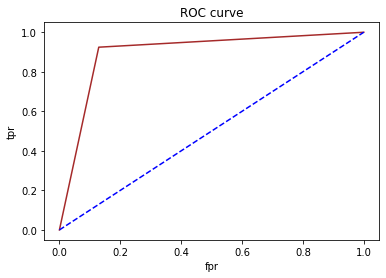

In [85]:
plt.plot(fpr,tpr,color='brown')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [86]:
print('Area under the curve ',roc_auc_score(y_test,y_predict))

Area under the curve  0.8975588242284486


In [87]:
import pickle

pickle.dump('RFC',open('Census_Income_RFC','wb'))
